In [1]:
import nltk
import pandas as pd
import torch
from titlegen.score import avg_score

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /users/eleves-b/2021/guilherme.vieira-
[nltk_data]     manhaes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
validation_df = pd.read_csv('../data/validation.csv')
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test_text.csv')

In [4]:
from nltk import sent_tokenize

In [5]:
train_df['text_sents'] = train_df['text'].apply(lambda x: sent_tokenize(x, language='french'))
validation_df['text_sents'] = validation_df['text'].apply(lambda x: sent_tokenize(x, language='french'))
test_df['text_sents'] = test_df['text'].apply(lambda x: sent_tokenize(x, language='french'))

In [6]:
train_df['titles_sents'] = train_df['titles'].apply(lambda x: sent_tokenize(x, language='french'))
validation_df['titles_sents'] = validation_df['titles'].apply(lambda x: sent_tokenize(x, language='french'))

In [7]:
train_df.head()

,text,titles,text_sents,titles_sents
0,Thierry Mariani sur la liste du Rassemblement ...,L'information n'a pas été confirmée par l'inté...,[Thierry Mariani sur la liste du Rassemblement...,[L'information n'a pas été confirmée par l'int...
1,C'est désormais officiel : Alain Juppé n'est p...,Le maire de Bordeaux ne fait plus partie des R...,[C'est désormais officiel : Alain Juppé n'est ...,[Le maire de Bordeaux ne fait plus partie des ...
2,La mesure est décriée par les avocats et les m...,"En 2020, les tribunaux d'instance fusionnent a...",[La mesure est décriée par les avocats et les ...,"[En 2020, les tribunaux d'instance fusionnent ..."
3,Dans une interview accordée au Figaro mercredi...,"Les médecins jugés ""gros prescripteurs d'arrêt...",[Dans une interview accordée au Figaro mercred...,"[Les médecins jugés ""gros prescripteurs d'arrê..."
4,Le préjudice est estimé à 2 millions d'euros. ...,Il aura fallu mobiliser 90 gendarmes pour cett...,[Le préjudice est estimé à 2 millions d'euros....,[Il aura fallu mobiliser 90 gendarmes pour cet...


In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
from sentence_transformers import SentenceTransformer
model =  SentenceTransformer("dangvantuan/sentence-camembert-base").to(device)

2024-03-13 09:37:55.017028: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 09:37:55.017071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 09:37:55.222372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 09:37:55.629334: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 09:37:57.704218: W tensorflow/compiler/tf2

In [10]:
tokenizer = model.tokenizer
tokenizer

PreTrainedTokenizerFast(name_or_path='/users/eleves-b/2021/guilherme.vieira-manhaes/.cache/torch/sentence_transformers/dangvantuan_sentence-camembert-base/', vocab_size=32005, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True), 'additional_special_tokens': ['<s>NOTUSED', '</s>NOTUSED']})

# trying knn

In [11]:
!pip install numpy scipy

In [12]:
import numpy as np
from scipy.spatial.distance import cdist

def knn_cosine_distance(vectors, target, k):
    """
    Find the k nearest neighbors of the target vector using cosine distance.

    :param vectors: A 2D numpy array of vectors.
    :param target: The target vector.
    :param k: The number of nearest neighbors to find.
    :return: The indices of the k nearest neighbors.
    """
    # Calculate cosine distances between target and all vectors
    distances = cdist([target], vectors, 'cosine')[0]

    # Get the indices of the k smallest distances
    nearest_indices = np.argsort(distances)[:k]

    return nearest_indices

In [13]:
train_df.head()

,text,titles,text_sents,titles_sents
0,Thierry Mariani sur la liste du Rassemblement ...,L'information n'a pas été confirmée par l'inté...,[Thierry Mariani sur la liste du Rassemblement...,[L'information n'a pas été confirmée par l'int...
1,C'est désormais officiel : Alain Juppé n'est p...,Le maire de Bordeaux ne fait plus partie des R...,[C'est désormais officiel : Alain Juppé n'est ...,[Le maire de Bordeaux ne fait plus partie des ...
2,La mesure est décriée par les avocats et les m...,"En 2020, les tribunaux d'instance fusionnent a...",[La mesure est décriée par les avocats et les ...,"[En 2020, les tribunaux d'instance fusionnent ..."
3,Dans une interview accordée au Figaro mercredi...,"Les médecins jugés ""gros prescripteurs d'arrêt...",[Dans une interview accordée au Figaro mercred...,"[Les médecins jugés ""gros prescripteurs d'arrê..."
4,Le préjudice est estimé à 2 millions d'euros. ...,Il aura fallu mobiliser 90 gendarmes pour cett...,[Le préjudice est estimé à 2 millions d'euros....,[Il aura fallu mobiliser 90 gendarmes pour cet...


In [14]:
def predict(data, k):
    t_enc = model.encode(data['text_sents']) 
    a_enc = model.encode(data['titles_sents']) 
    idx = knn_cosine_distance(t_enc, a_enc.mean(axis=0), k)
    idx.sort()
    sents = [data['text_sents'][i] for i in idx]
    return "\n".join(sents)

train_df[:1].apply(lambda x: predict(x, 3), axis=1)


0    On n'est pas obligé de l'annoncer tout de suit...
dtype: object

In [15]:
sub_train = train_df.sample(1000)

In [16]:
from tqdm import tqdm
tqdm.pandas(desc="Processing")

for k in range (1,5):
    print(k)
    sub_train[f'titles_{k}'] = sub_train.progress_apply(lambda x: predict(x, k), axis=1)

1


Processing: 100%|██████████| 1000/1000 [00:28<00:00, 34.82it/s]


2


Processing: 100%|██████████| 1000/1000 [00:28<00:00, 34.59it/s]


3


Processing: 100%|██████████| 1000/1000 [00:29<00:00, 34.14it/s]


4


Processing: 100%|██████████| 1000/1000 [00:29<00:00, 33.58it/s]


In [17]:
def compare_avg(data, k):
    t_enc = model.encode(data['text_sents']) 
    idx = knn_cosine_distance(t_enc, t_enc.mean(axis=0), k)
    idx.sort()
    sents = [data['text_sents'][i] for i in idx]
    return "\n".join(sents)

train_df[:1].apply(lambda x: predict(x, 3), axis=1)


0    On n'est pas obligé de l'annoncer tout de suit...
dtype: object

In [18]:
for k in range (1,5):
    print(k)
    sub_train[f'titles_mean_{k}'] = sub_train.progress_apply(lambda x: compare_avg(x, k), axis=1)

1


Processing: 100%|██████████| 1000/1000 [00:22<00:00, 44.53it/s]


2


Processing: 100%|██████████| 1000/1000 [00:22<00:00, 43.98it/s]


3


Processing: 100%|██████████| 1000/1000 [00:22<00:00, 43.99it/s]


4


Processing: 100%|██████████| 1000/1000 [00:22<00:00, 43.90it/s]


In [19]:
scores=[]
for i in range(1, 5):
    score=avg_score(sub_train[f'titles_{i}'], sub_train['titles'])
    scores.append((i, score))
scores

[(1, 0.24354306005260704),
 (2, 0.21286853704648048),
 (3, 0.18122382822328223),
 (4, 0.15878471188247242)]

In [20]:
scores=[]
for i in range(1, 5):
    score=avg_score(sub_train[f'titles_mean_{i}'], sub_train['titles'])
    scores.append((i, score))
scores

[(1, 0.1564160911306488),
 (2, 0.15127199384947476),
 (3, 0.140372433436728),
 (4, 0.1309837798439117)]

# Trying linear model

In [21]:
train_df.head()

,text,titles,text_sents,titles_sents
0,Thierry Mariani sur la liste du Rassemblement ...,L'information n'a pas été confirmée par l'inté...,[Thierry Mariani sur la liste du Rassemblement...,[L'information n'a pas été confirmée par l'int...
1,C'est désormais officiel : Alain Juppé n'est p...,Le maire de Bordeaux ne fait plus partie des R...,[C'est désormais officiel : Alain Juppé n'est ...,[Le maire de Bordeaux ne fait plus partie des ...
2,La mesure est décriée par les avocats et les m...,"En 2020, les tribunaux d'instance fusionnent a...",[La mesure est décriée par les avocats et les ...,"[En 2020, les tribunaux d'instance fusionnent ..."
3,Dans une interview accordée au Figaro mercredi...,"Les médecins jugés ""gros prescripteurs d'arrêt...",[Dans une interview accordée au Figaro mercred...,"[Les médecins jugés ""gros prescripteurs d'arrê..."
4,Le préjudice est estimé à 2 millions d'euros. ...,Il aura fallu mobiliser 90 gendarmes pour cett...,[Le préjudice est estimé à 2 millions d'euros....,[Il aura fallu mobiliser 90 gendarmes pour cet...


In [22]:
def pad_list(l, length, el):
    if len(l)<length:
        return l + [el]*(length - len(l))
    return l[:length]
pad_list([[1, 2], [3]], 2, [])

[[1, 2], [3]]

In [23]:
max_num_sents = 30
max_sent_len= 128

In [24]:
def get_sent_emb(x):
    item = x['text_sents']
    item = pad_list(item, max_num_sents, tokenizer.pad_token)
    return model.encode(item)

def get_title_emb(x):
    out = x['titles_sents']
    return model.encode(out).mean(axis=0)

In [25]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, data, sample=None):
        if sample is not None:
            data=data.sample(sample).reset_index()
        self.data = data
        self.data['sent_embs'] = self.data.progress_apply(get_sent_emb, axis=1)
        self.data['title_embs'] = self.data.progress_apply(get_title_emb, axis=1)

    def __len__(self):
        return len(self.data)

class TrainDS(TextDataset):
    def __getitem__(self, idx):
        in_embeddings = torch.tensor(self.data.loc[idx, 'sent_embs']).to(device)
        out_embeddings = torch.tensor(self.data.loc[idx, 'title_embs']).to(device)
        return in_embeddings, out_embeddings
    
class ValDS(TextDataset):
    def __getitem__(self, idx):
        item = self.data.loc[idx, 'text_sents']
        item = pad_list(item, max_num_sents, tokenizer.pad_token)
        in_embeddings = torch.tensor(self.data.loc[idx, 'sent_embs']).to(device)
        return in_embeddings, item, self.data.loc[idx, 'titles']
    
class TestDS(TextDataset):
    def __init__(self, data):
        self.data = data
        self.data['sent_embs'] = self.data.progress_apply(get_sent_emb, axis=1)
        
    def __getitem__(self, idx):
        item = self.data.loc[idx, 'text_sents']
        item = pad_list(item, max_num_sents, tokenizer.pad_token)
        in_embeddings = torch.tensor(self.data.loc[idx, 'sent_embs']).to(device)
        return in_embeddings, item

In [34]:
train_dataset = TrainDS(train_df, 10000)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

Processing: 100%|██████████| 10000/10000 [01:18<00:00, 126.64it/s]


In [ ]:
val_dataset = ValDS(validation_df, 1000)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [ ]:
test_dataset = TestDS(test_df)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [26]:
fullval_dataset = ValDS(validation_df)
fullval_dataloader = DataLoader(fullval_dataset, batch_size=32, shuffle=True)

Processing: 100%|██████████| 1500/1500 [00:11<00:00, 126.90it/s]


In [59]:
import torch
import torch.nn as nn
import torch.optim as optim

class CustomModel(nn.Module):
    def __init__(self, d, k):
        super(CustomModel, self).__init__()
        self.k = k
        self.relu = nn.ReLU()
        self.dp = nn.Dropout()

        self.le1 = nn.Linear(d, 256)
        self.le2 = nn.Linear(256, 64)

        self.lin = nn.Linear(64, 64)

        self.ld1 = nn.Linear(64, 256)
        self.ld2 = nn.Linear(256, d)
        
        self.lf = nn.Linear(d, d)



    def forward(self, x):
        x = self.relu(self.le1(x))
        x = self.dp(x)
        x = self.relu(self.le2(x))

        x = self.lin(x)

        x = self.relu(self.ld1(x))
        x = self.dp(x)
        x = self.relu(self.ld2(x))

        return self.lf(x).sum(dim=1)


def train(model, train_dataloader, val_dataloader, epochs):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    l = []
    s = []
    for epoch in range(epochs):
        b_loss=0
        for data, targets in train_dataloader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            b_loss += loss.item()
            optimizer.step()
        
        score = validate(model, val_dataloader)
        s.append(score)
        l.append(b_loss)

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {b_loss:.4f}, score: {score:.4f}')

    return l, s

def validate(model, dataloader):
    preds=[]
    trues=[]    
    for in_embeddings, sents, title in dataloader:
        outputs = model(in_embeddings)
        outputs = outputs.unsqueeze(-1)
        inner = torch.bmm(in_embeddings, outputs).squeeze(-1)
        kidxs = torch.topk(inner, k=model.k).indices.sort().values
        choosen_sents = ["\n".join([sents[idx][i] for idx in kidx]) for i, kidx in enumerate(kidxs)]
        preds.extend(choosen_sents)
        trues.extend(list(title))
    score = avg_score(preds, trues)

    return score


def test(model, dataloader):
    preds=[]
    for in_embeddings, sents in dataloader:
        outputs = model(in_embeddings)
        outputs = outputs.unsqueeze(-1)
        inner = torch.bmm(in_embeddings, outputs).squeeze(-1)
        kidxs = torch.topk(inner, k=model.k).indices.sort().values
        choosen_sents = ["\n".join([sents[idx][i] for idx in kidx]) for i, kidx in enumerate(kidxs)]
        preds.extend(choosen_sents)
    return preds



In [60]:
m = CustomModel(768, 3)
m.to(device)

CustomModel(
  (relu): ReLU()
  (dp): Dropout(p=0.5, inplace=False)
  (le1): Linear(in_features=768, out_features=256, bias=True)
  (le2): Linear(in_features=256, out_features=64, bias=True)
  (lin): Linear(in_features=64, out_features=64, bias=True)
  (ld1): Linear(in_features=64, out_features=256, bias=True)
  (ld2): Linear(in_features=256, out_features=768, bias=True)
  (lf): Linear(in_features=768, out_features=768, bias=True)
)

In [61]:
validate(m, val_dataloader)

0.1326201150327332

In [62]:
epochs = 500

loss, scores = train(m, train_dataloader, val_dataloader, epochs)

Epoch [1/500], Loss: 3.7348, score: 0.1461
Epoch [2/500], Loss: 2.1588, score: 0.1431
Epoch [3/500], Loss: 2.0963, score: 0.1463
Epoch [4/500], Loss: 2.0419, score: 0.1474
Epoch [5/500], Loss: 2.0038, score: 0.1496
Epoch [6/500], Loss: 1.9738, score: 0.1520
Epoch [7/500], Loss: 1.9443, score: 0.1505
Epoch [8/500], Loss: 1.9280, score: 0.1531
Epoch [9/500], Loss: 1.9152, score: 0.1531
Epoch [10/500], Loss: 1.9033, score: 0.1542
Epoch [11/500], Loss: 1.8861, score: 0.1507
Epoch [12/500], Loss: 1.8771, score: 0.1501
Epoch [13/500], Loss: 1.8690, score: 0.1516
Epoch [14/500], Loss: 1.8602, score: 0.1524
Epoch [15/500], Loss: 1.8500, score: 0.1496
Epoch [16/500], Loss: 1.8465, score: 0.1526
Epoch [17/500], Loss: 1.8377, score: 0.1550
Epoch [18/500], Loss: 1.8371, score: 0.1544
Epoch [19/500], Loss: 1.8293, score: 0.1521
Epoch [20/500], Loss: 1.8257, score: 0.1546
Epoch [21/500], Loss: 1.8205, score: 0.1516
Epoch [22/500], Loss: 1.8150, score: 0.1539
Epoch [23/500], Loss: 1.8129, score: 0.15

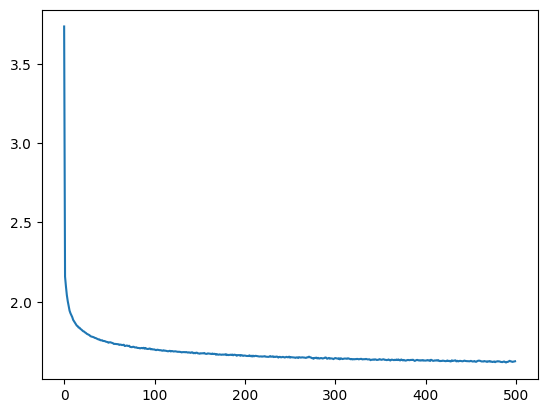

In [63]:
import matplotlib.pyplot as plt

plt.plot(loss)


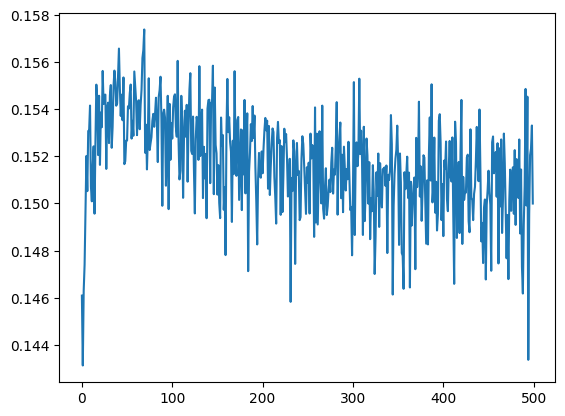

In [64]:
plt.plot(scores)

In [65]:
validate(m, fullval_dataloader)

0.1511781385263564

In [32]:
preds = test(m, test_dataloader)